# Exploring the Data

Import the train and test Titanic data. Some notes about the data from Kaggle:

## Variable Descriptions

* `survival` - Survival (0 = No; 1 = Yes)
* `pclass` - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* `name` - Name
* `sex` - Sex
* `age` - Age
* `sibsp` - Number of Siblings/Spouses Aboard
* `parch` - Number of Parents/Children Aboard
* `ticket` - Ticket Number
* `fare` - Passenger Fare
* `cabin` - Cabin
* `embarked` - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

## Special Notes
* Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower
* Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5
* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.
  * **Sibling:** Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
  * **Spouse:** Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
  * **Parent:** Mother or Father of Passenger Aboard Titanic
  * **Child:** Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

  Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

In [1]:
import numpy as np
import pandas as pd

# import the data, get a preview, and summary of the data fields
titanic_df = pd.read_csv("../input/train.csv", dtype={"Age": np.float64})
test_df = pd.read_csv("../input/test.csv", dtype={"Age": np.float64})

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Cleaning the Data

## Unncessary Columns

* `passengerid` - just use table indices. no other fields refer to `passengerid` (e.g. family information)
* `name` - unless identification of families becomes relevant
* `ticket` - unless somehow the ticket format indicates additional information

## Massaging

* `age`
  * there are 177/891 missing `age` data (20%)
  * **Solution** - remove entires with missing age
* `cabin`
  * there are 687/891 **(!)** missing `cabin` data
  * **Solution #1** - ignore (i.e. remove "`cabin`" from data)
  * **Solution #2** - first, try to predict cabin data based on other factors. then, use data to build predictive model.
* `embarked`
  * there are 2/891 missing `embarked` data
  * **Solution** - assume `embarked = S`, the most common port
* `fare`
  * there are 15/891 entries with `fare == 0`
  * don't know what zero fare means
  * **Solution** - leave alone?

In [4]:
# unnecessary data
# 
# note: we need `PassengerId` of the test data for submission
titanic_df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
test_df.drop(['Name', 'Ticket'], axis=1, inplace=True)

# massaging
titanic_df.dropna(axis=0, subset=['Age'], inplace=True)
titanic_df.drop('Cabin', axis=1, inplace=True) # STRONG!
titanic_df.fillna({'Embarked':'S'}, inplace=True)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C
10,1,3,female,4.0,1,1,16.7000,S


# Plotting

## Plot #1 - Grouped By Class, Age and Fare

Before doing any analysis I want to see the data. I know this is not always possible but...whatevs.

<IPython.core.display.Javascript object>


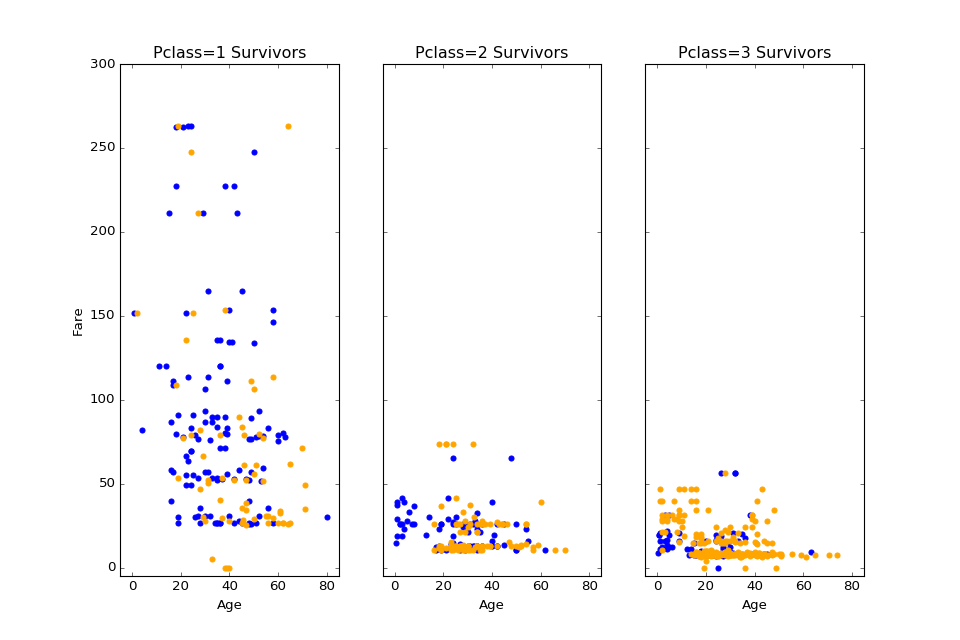

In [5]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, sharey=True, figsize=(12,8))
axes[0].set_ylabel('Fare')
for pclass in [1,2,3]:
    Pclass = titanic_df[titanic_df['Pclass'] == pclass]
    Pclass_survived = Pclass[Pclass['Survived'] == 1]
    Pclass_not_survived = Pclass[Pclass['Survived'] == 0]

    # select axes and adjust presentation
    ax = axes[pclass-1]
    ax.hold(True)
    ax.set_title('Pclass=%d Survivors'%(pclass))
    ax.set_xlabel('Age')
    ax.set_xlim(-5,85)
    ax.set_ylim(-5,300)

    # plot age vs fare data
    x = Pclass_survived['Age'].values
    y = Pclass_survived['Fare'].values
    ax.scatter(x, y, color='blue')

    x = Pclass_not_survived['Age'].values
    y = Pclass_not_survived['Fare'].values
    ax.scatter(x, y, color='orange')
    
fig.show()